**R4 ENSEMBLE TECHNIQUES PROJECT-1**

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**QUESTION 1 - Load the dataset**

In [7]:
park = pd.read_csv("parkinsons.csv")
park.head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


**QUESTION 2 - It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)**

In [8]:
park.shape

(195, 24)

In [9]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

**There are 24 attributes to this dataset - the class variable or the predcited variable being discrete, the variable name being categorical and the remaining 22 variables being continuous.**

**A parametric model might be too simplistic a model for a dataset with so many features, hence a non-parametric classification model could be the way to go, such as a decision tree.**

**The dataset has only 195 observations which could possibly give a less reliable model. Hence the decision tree has to be supported with some ensemble technique and thus try & reduce variance errors as much as possible.**

In [10]:
park.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
park.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


**QUESTION 3 - Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)**

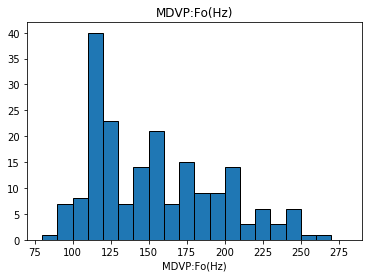

In [12]:
##frequency distribution of MDVP:Fo(Hz)
plt.hist(park["MDVP:Fo(Hz)"], 20, range=(80, 280), edgecolor='black')
plt.title('MDVP:Fo(Hz)')
plt.xlabel('MDVP:Fo(Hz)')
plt.show()

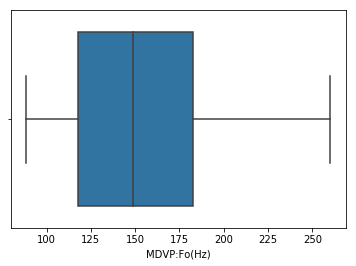

In [13]:
sns.boxplot(x=park["MDVP:Fo(Hz)"])

**The distribution looks slightly right skewed, but doesnt indicate outliers**

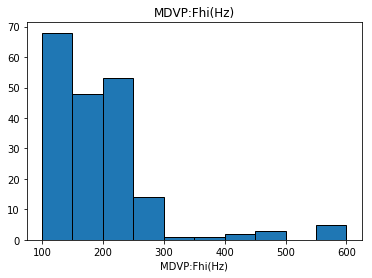

In [14]:
##frequency distribution of MDVP:Fhi(Hz)
plt.hist(park["MDVP:Fhi(Hz)"], 10, range=(100, 600), edgecolor='black')
plt.title('MDVP:Fhi(Hz)')
plt.xlabel('MDVP:Fhi(Hz)')
plt.show()

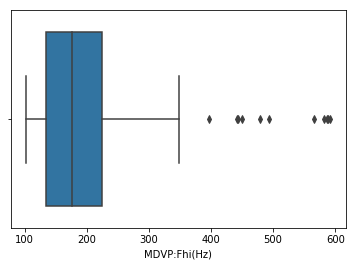

In [15]:
sns.boxplot(x=park["MDVP:Fhi(Hz)"])

**The distribution looks slightly right skewed, indicating possible outliers in the higher direction.**

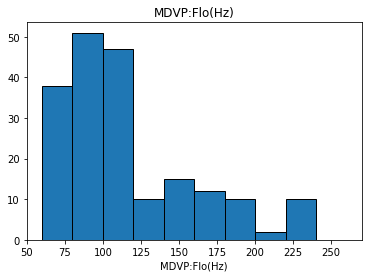

In [16]:
##frequency distribution of MDVP:Flo(Hz)
plt.hist(park["MDVP:Flo(Hz)"], 10, range=(60, 260), edgecolor='black')
plt.title('MDVP:Flo(Hz)')
plt.xlabel('MDVP:Flo(Hz)')
plt.show()

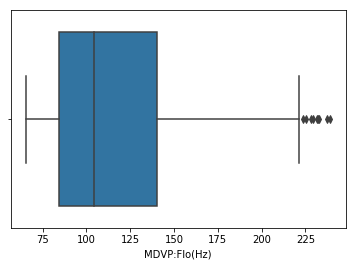

In [17]:
sns.boxplot(x=park["MDVP:Flo(Hz)"])

**The distribution looks right skewed, indicating possible outliers in the higher direction.**

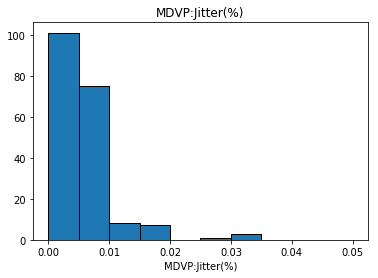

In [18]:
##frequency distribution of MDVP:Jitter(%))
plt.hist(park["MDVP:Jitter(%)"], 10, range=(0, 0.05), edgecolor='black')
plt.title('MDVP:Jitter(%)')
plt.xlabel('MDVP:Jitter(%)')
plt.show()

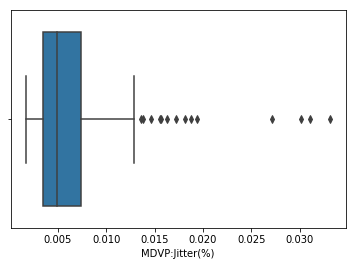

In [19]:
sns.boxplot(x=park["MDVP:Jitter(%)"])

**The distribution looks slightly right skewed, indicating possible outliers in the higher direction.**

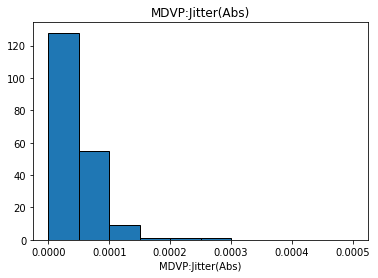

In [20]:
##frequency distribution of MDVP:Jitter(Abs)
plt.hist(park["MDVP:Jitter(Abs)"], 10, range=(0, 0.0005), edgecolor='black')
plt.title('MDVP:Jitter(Abs)')
plt.xlabel('MDVP:Jitter(Abs)')
plt.show()

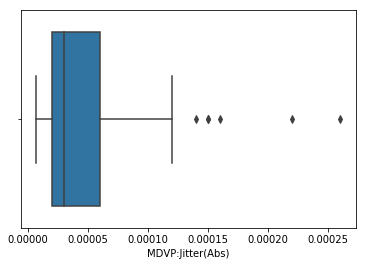

In [21]:
sns.boxplot(x=park["MDVP:Jitter(Abs)"])

**The distribution looks right skewed, indicating possible outliers in the higher direction.**

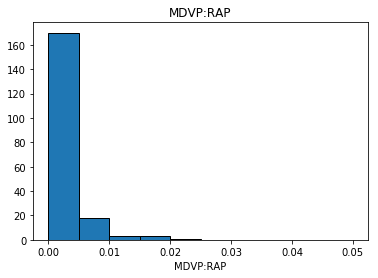

In [22]:
##frequency distribution of MDVP:RAP
plt.hist(park["MDVP:RAP"], 10, range=(0, 0.05), edgecolor='black')
plt.title('MDVP:RAP')
plt.xlabel('MDVP:RAP')
plt.show()

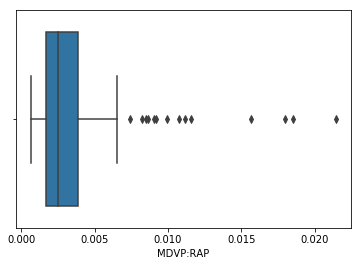

In [23]:
sns.boxplot(x=park["MDVP:RAP"])   

**The distribution looks right skewed, indicating possible outliers in the higher direction.**

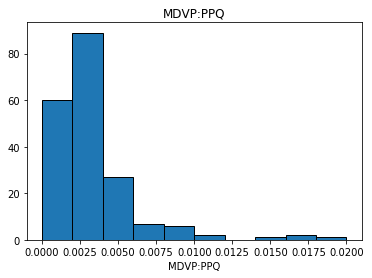

In [24]:
##frequency distribution of MDVP:PPQ
plt.hist(park["MDVP:PPQ"], 10, range=(0, 0.02), edgecolor='black')
plt.title('MDVP:PPQ')
plt.xlabel('MDVP:PPQ')
plt.show()

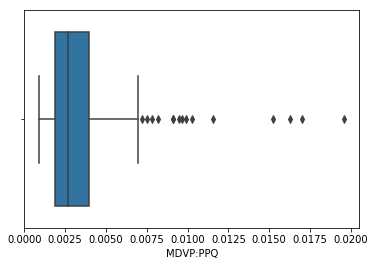

In [25]:
sns.boxplot(x=park["MDVP:PPQ"])   

**The distribution looks right skewed, indicating possible outliers in the higher direction.**

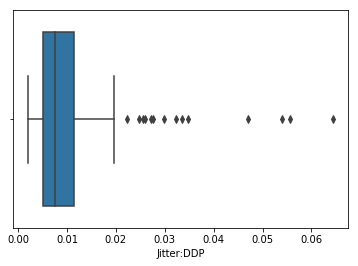

In [26]:
sns.boxplot(x=park["Jitter:DDP"])   

**The distribution looks right skewed, indicating possible outliers in the higher direction.**

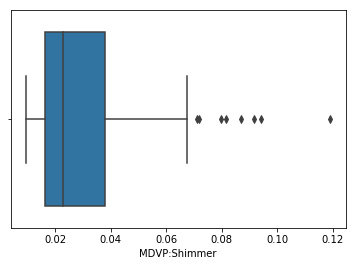

In [27]:
sns.boxplot(x=park["MDVP:Shimmer"])   

**The distribution looks highly right skewed, indicating possible outliers in the higher direction.**

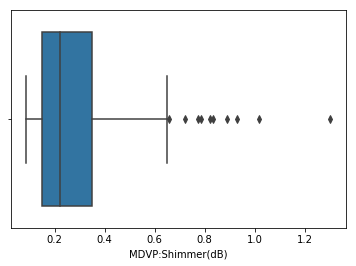

In [28]:
sns.boxplot(x=park["MDVP:Shimmer(dB)"])   

**The distribution looks highly right skewed, indicating possible outliers in the higher direction.**

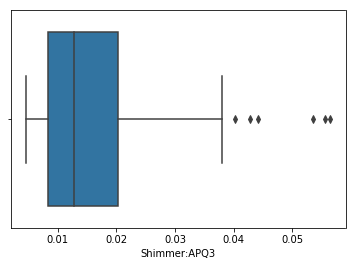

In [29]:
sns.boxplot(x=park["Shimmer:APQ3"])   

**The distribution looks highly right skewed, indicating possible outliers in the higher direction.**

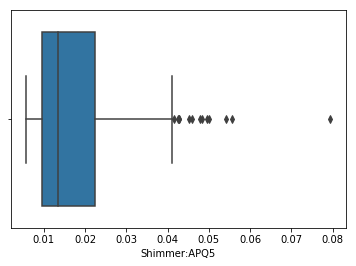

In [30]:
sns.boxplot(x=park["Shimmer:APQ5"]) 

**The distribution looks highly right skewed, indicating possible outliers in the higher direction.**

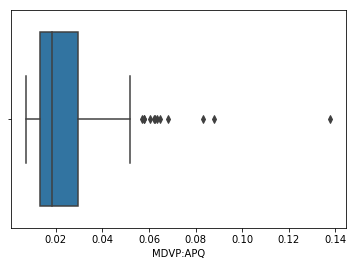

In [31]:
sns.boxplot(x=park["MDVP:APQ"]) 

**The distribution looks highly right skewed, indicating possible outliers in the higher direction.**

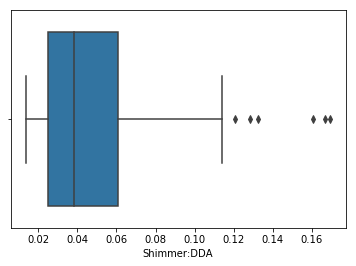

In [32]:
sns.boxplot(x=park["Shimmer:DDA"]) 

**The distribution looks highly right skewed, indicating possible outliers in the higher direction.**

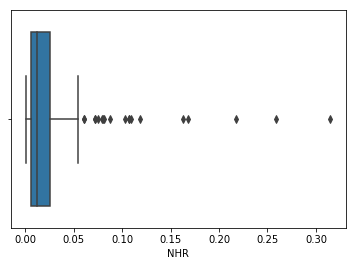

In [33]:
sns.boxplot(x=park["NHR"]) 

**The distribution looks highly right skewed, indicating possible outliers in the higher direction.**

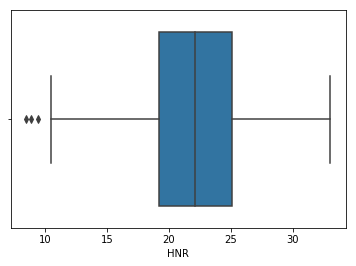

In [34]:
sns.boxplot(x=park["HNR"]) 

**The distribution looks slightly left skewed, indicating possible outliers in the lower direction.**

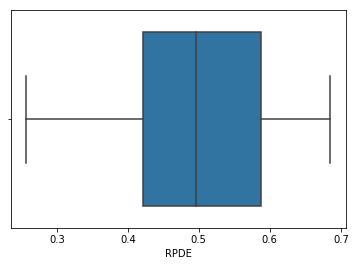

In [35]:
sns.boxplot(x=park["RPDE"]) 

**The distribution looks slightly left skewed, indicating possible outliers in the lower direction.**

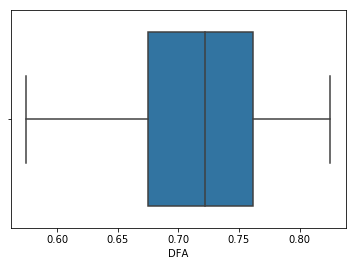

In [36]:
sns.boxplot(x=park["DFA"]) 

**The distribution looks slightly left skewed, indicating possible outliers in the lower direction.**

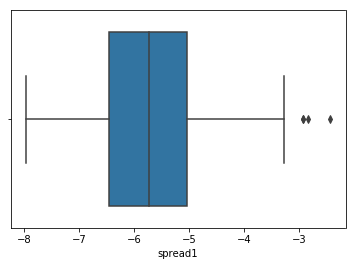

In [37]:
sns.boxplot(x=park["spread1"]) 

**The distribution looks a near normal distribution despite indication of a few outliers in the higher direction**

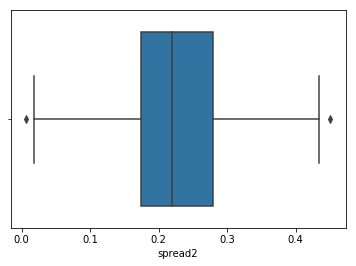

In [38]:
sns.boxplot(x=park["spread2"]) 

**The distribution looks a near normal distribution despite indication of a few outliers in either direction**

In [39]:
park.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


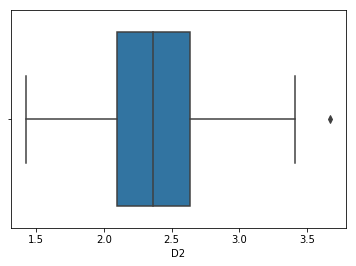

In [40]:
sns.boxplot(x=park["D2"]) 

**The distribution looks a near normal distribution**

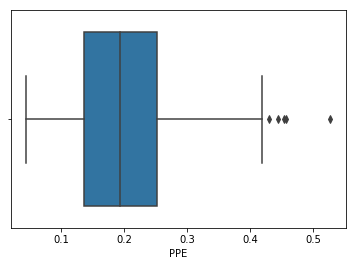

In [41]:
sns.boxplot(x=park["PPE"]) 

**The distribution looks slightly right skewed indicating few outliers in the higher direction.**

**CHECKING THE CLASS DISTRIBUTION IN THE GIVEN DATASET**

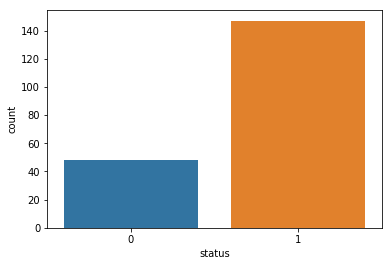

In [42]:
##class distribution 
sns.countplot(x=park['status'])

**The above plot shows an imbalance in the class distribution in the dataset. While '1' represents the presence of 'Parkinsons Disease (PD)', '0' represents the absense of 'PD'.**

**In the case at hand, class '1' is to be considered the class of interest because the objective is to successfully identify a potential 'PD' patient. Hence a type 2 error (False Negative) is highly undeasirable.**

**On the other hand, in this case, a Type 1 error (FP) is tolerable as it would only lead to providing extra attention to the person or even identify if the person as a border case.**

**Hence the class imbalance in favour of class 1 in this case is not entirely undesirable as it could help reduce Type 2 errors(FN) but at the expense of increased Type 1 errors(FP). The less number of observations available for training also supports this approach.**

In [43]:
##dropping the categorical variable 'Name'
park.drop(columns = 'name', inplace = True)

In [44]:
##moving the status (class) column to the right end of the dataframe
cols_at_end = ['status']
park = park[[c for c in park if c not in cols_at_end] 
        + [c for c in cols_at_end if c in park]]
park.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1


D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


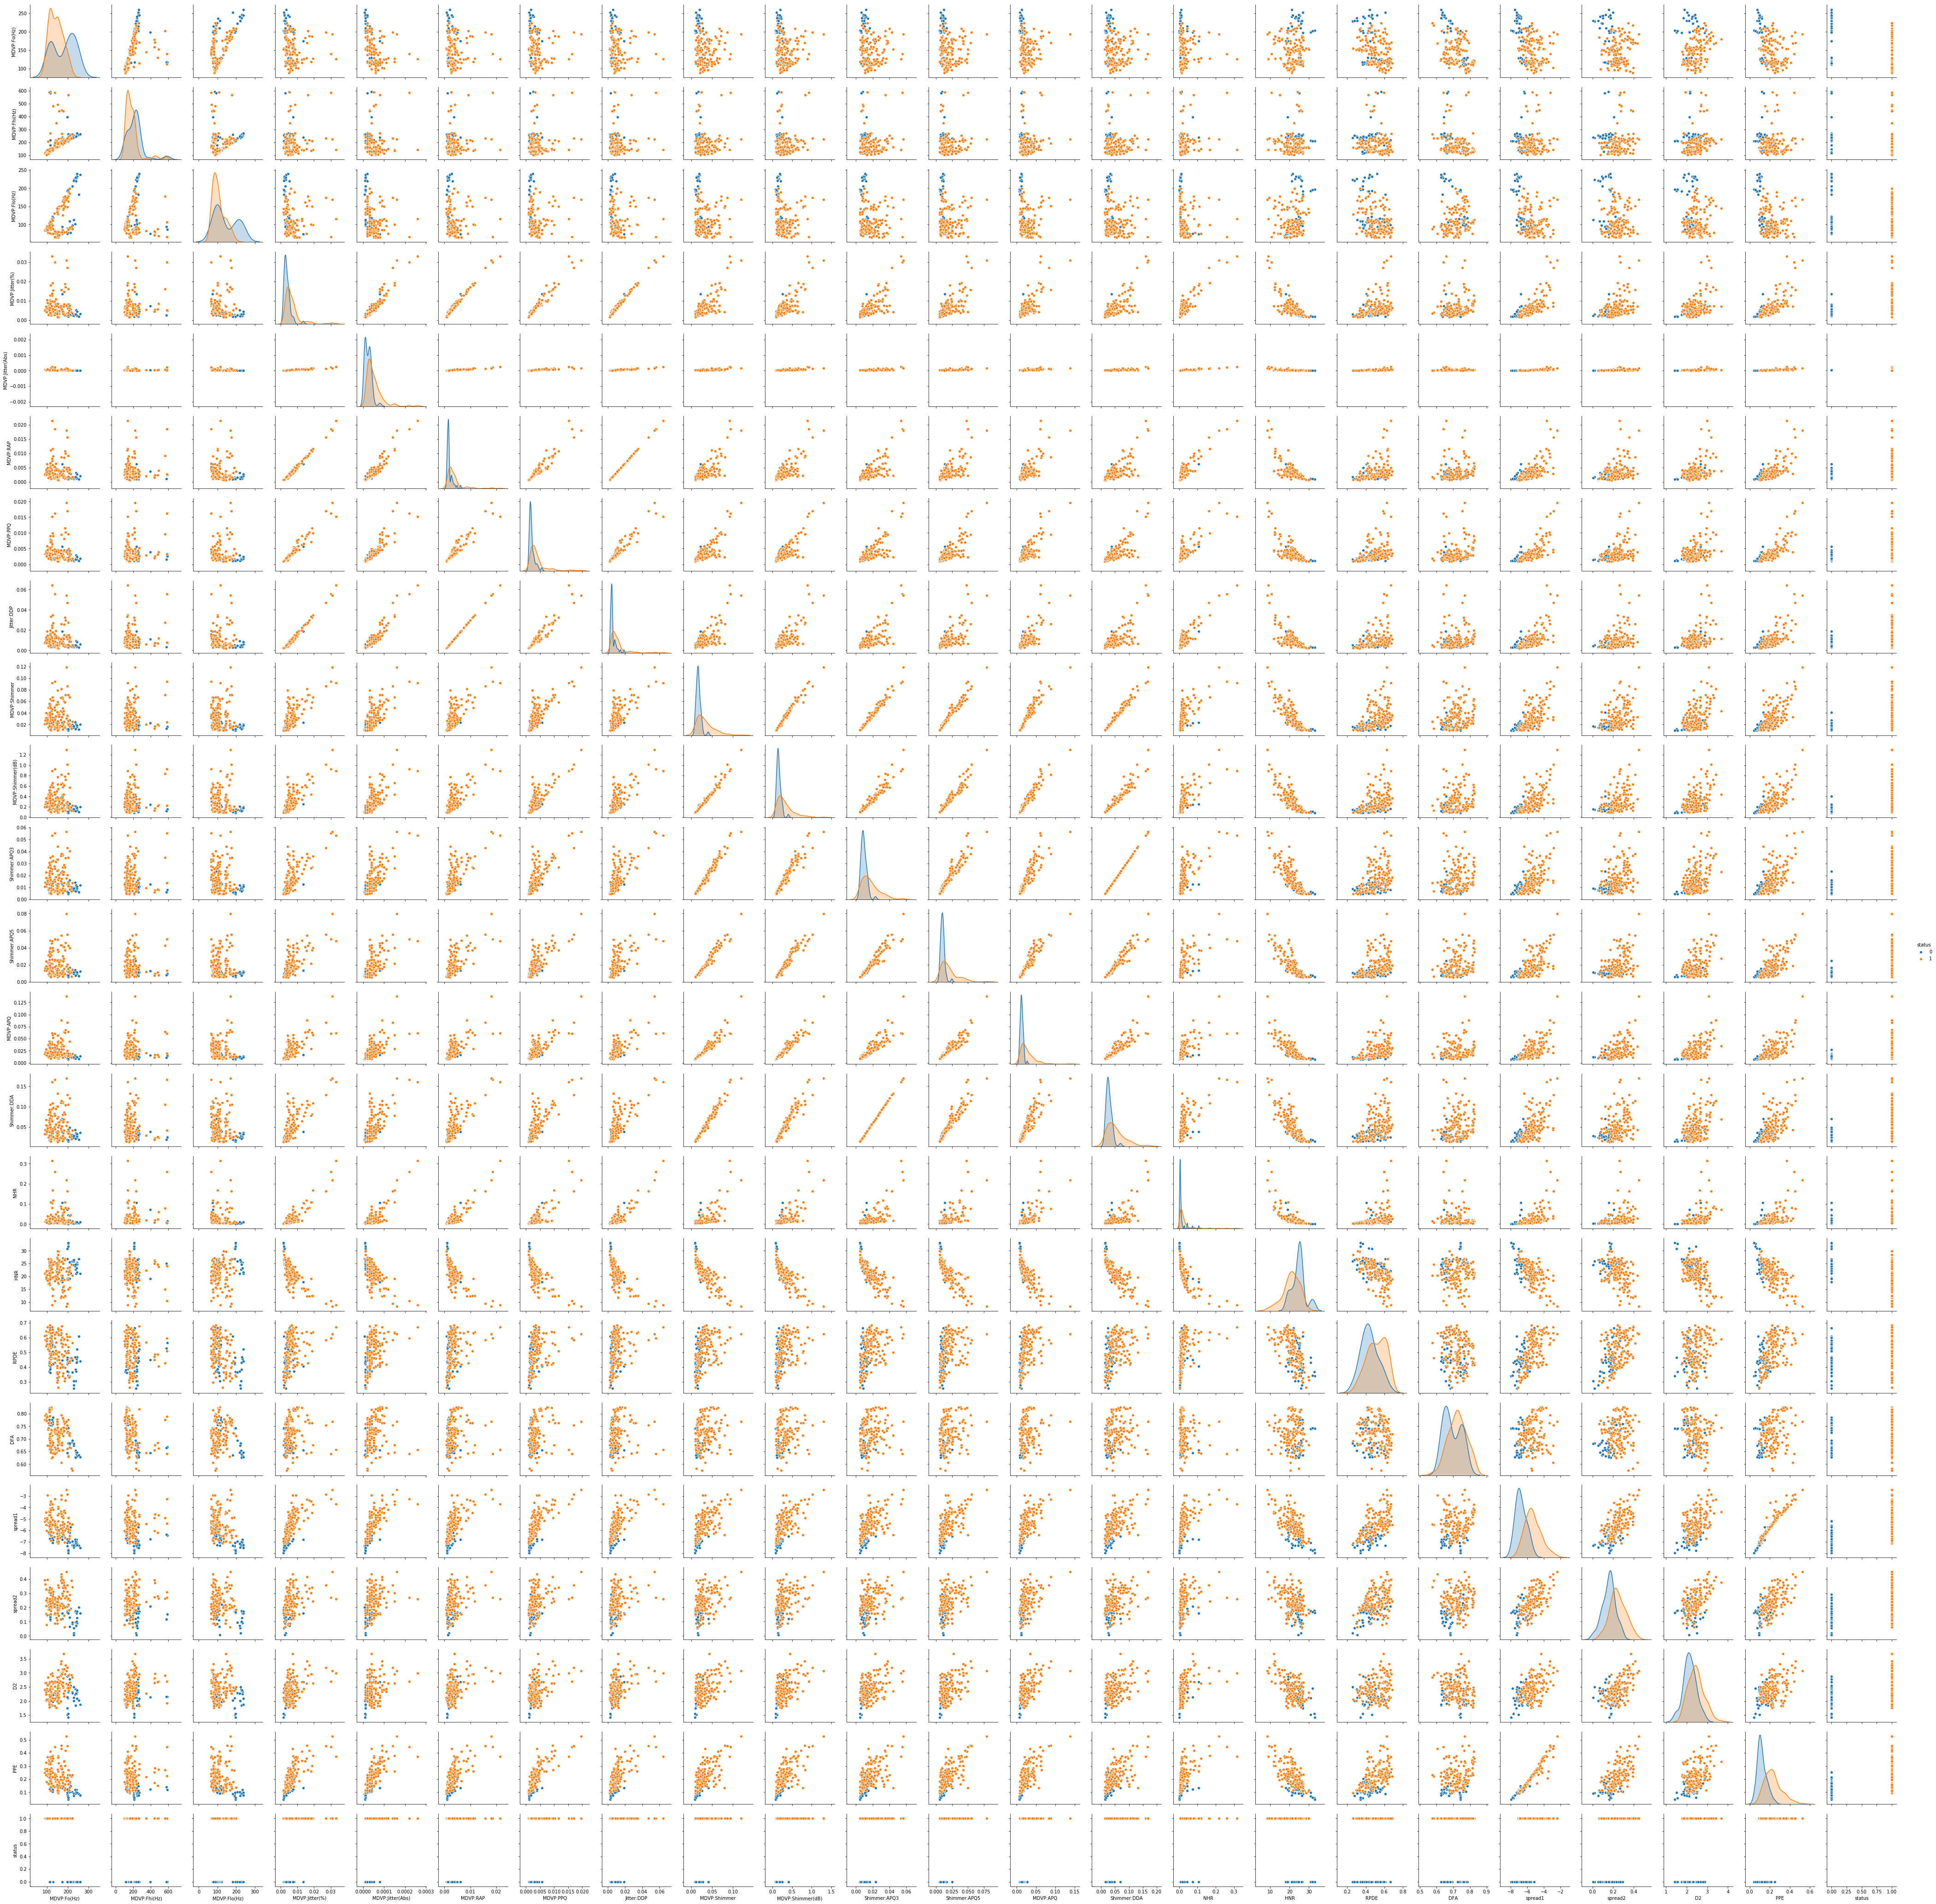

In [45]:
sns.pairplot(park, diag_kind = 'kde', hue = "status")

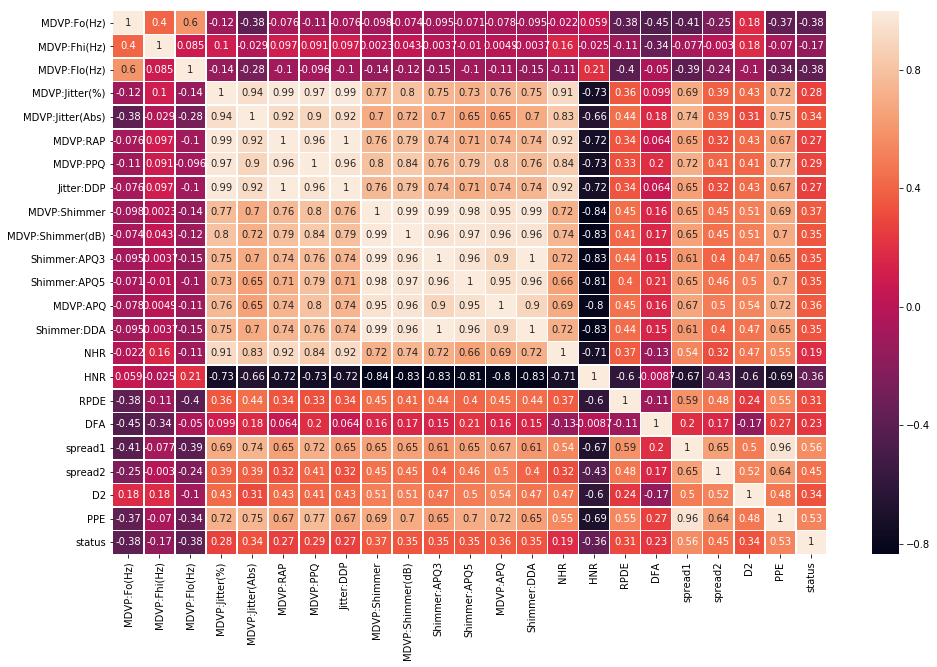

In [47]:
plt.figure(figsize = (16,10))
sns.heatmap(park.corr(),annot=True,linewidths=.5)

**We do not attempt to remove outlier rows from the dataset for 2 reasons:**

1. We are using a decision tree model which is robust to outliers
2. The number of observsations available is very low.

**There seem to be significant multicollinearity present in the dataset as evident from the heatmap. However, we do not attempt to remove the same because we have a prediction problem at hand and not an inferential one.**

**It is however noted that removing redundant variables using any dimension reduction technique would speed up the decision tree building process as it has to try fewer steps in finding the right variables to start the splitting process.**

**QUESTION 4 - Split the dataset into training and test set in the ratio of 70:30 (Training:Test)**

In [48]:
X = park.drop('status', axis=1)
y = park['status']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**QUESTION 5 - Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)**

In [51]:
dt_model = DecisionTreeClassifier(criterion ='entropy')

In [52]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
y_pred_train = dt_model.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

**The training set accuracy score of 1.0 shows that the model is an overfitted one**

**QUESTION 6 - Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)**

In [54]:
y_pred = dt_model.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred), "%")

Accuracy is  0.864406779661017 %


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



**We can observe that the recall value is high for class 1 which indicates low type 2 errors (FN)**

**It can also be observed that the precision value is also high for class 1 which indicates low Type 1 errors(FP).** 

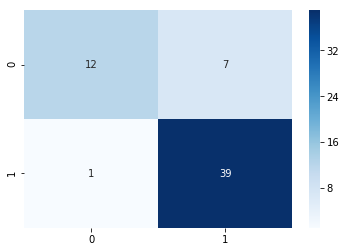

In [56]:
##cross tab of available test values & predicted values (same as a confusion matrix)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g')

**QUESTION 7 - Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)**

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
sample_leaf_range = list(range(1, 50))
grid = {'max_depth' : list(range(2,30)), 'min_samples_leaf' : sample_leaf_range}

In [59]:
dt_model_cv = GridSearchCV(dt_model, grid, scoring='accuracy', cv = 5)
dt_model_cv.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17,

In [60]:
grid_search_results = dt_model_cv
print("Max score achieved", dt_model_cv.best_score_)

Max score achieved 0.8823529411764706


In [61]:
print("Optimal values of hyperparameters are", dt_model_cv.best_params_)

Optimal values of hyperparameters are {'max_depth': 2, 'min_samples_leaf': 24}


**1. The model accuracy on the training set was 1.0 which indicated an overfitted model.**

**2. Further to regularization & fitting on the training data, the accuracy came out to be 0.897**

**3. This indicates that regularization has helped to produce a model which is adeqautely fit and has given out the optimal hyperparameters**

**Testing the model using the optimal hyperparameters on the testing set**

In [64]:
predictions2 = dt_model_cv.predict(X_test)

In [65]:
print("Accuracy score is ", accuracy_score(y_test, predictions2), "%")

Accuracy score is  0.8135593220338984 %


**QUESTION 8 - Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)**

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfcl = RandomForestClassifier()

In [68]:
rfcl = rfcl.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
y_pred_train = dt_model.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [70]:
y_pred_train3 = rfcl.predict(X_train)
accuracy_score(y_train, y_pred_train3)

0.9926470588235294

**The training set accuracy score of 1.0 shows that the model is an overfitted one**

In [71]:
predictions3 = rfcl.predict(X_test)
print("Accuracy is", accuracy_score(y_test, predictions3), "%")

Accuracy is 0.8305084745762712 %


**Implementing Random Forest Classifier using the Cross Validation Method**

In [72]:
max_feat = list(range(5,10))

In [73]:
##preparing the grid

grid3 = {'n_estimators' : list(range(1,100))}

rfcl_cv = GridSearchCV(rfcl, grid, scoring='accuracy', cv = 5)


In [74]:
rfcl_cv.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [75]:
print("Max score achieved",rfcl_cv.best_score_)

Max score achieved 0.9191176470588235


In [76]:
print("Optimal values of hyperparameters are", rfcl_cv.best_params_)

Optimal values of hyperparameters are {'max_depth': 9, 'min_samples_leaf': 1}


**Optimal Number of Trees**

In [77]:
print("Optimal value of Trees - ", rfcl_cv.best_estimator_.n_estimators)

Optimal value of Trees -  10
